In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import rcParams
from scipy import stats 
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import statsmodels.formula.api as smf

In [25]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train['data']="train"
test['data']="test"
master=pd.concat([train, test])
master_data=master.copy()

In [3]:
master.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [26]:
master.info()
##here we can see how many mising data we have plus the type of each variable.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [28]:
master.isnull().sum()
#making sure which variables have missing data.

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [29]:
master.describe()
#we can see that the item_weight and Item_MRP and Year are relatively well distributed


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Fat_Content'>

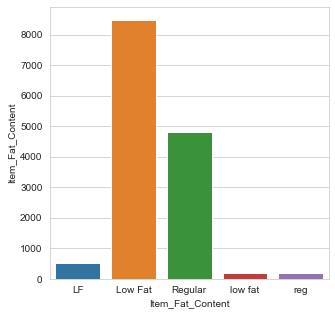

In [31]:
Fat= master.groupby('Item_Fat_Content')['Item_Fat_Content'].agg(len)
sns.barplot(x=Fat.index, y=Fat)
#we can see that the low fat and regular fat need data cleaning
#since we have "LF","Low Fat" and "low fat" describing being low fat
#and "Regular" & "reg" descrining being regular fat

In [32]:

master['Item_Fat_Content']=master['Item_Fat_Content'].replace("LF", "Low Fat", regex=True)
master['Item_Fat_Content']=master['Item_Fat_Content'].replace("low fat", "Low Fat", regex=True)
master['Item_Fat_Content']=master['Item_Fat_Content'].replace("reg", "Regular", regex=True)   


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Fat_Content'>

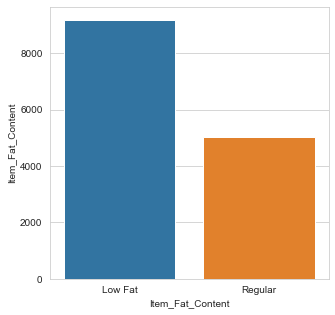

In [10]:
Fat= master.groupby('Item_Fat_Content')['Item_Fat_Content'].agg(len)
sns.barplot(x=Fat.index, y=Fat)
#cleaned

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Baking Goods'),
  Text(1, 0, 'Breads'),
  Text(2, 0, 'Breakfast'),
  Text(3, 0, 'Canned'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Frozen Foods'),
  Text(6, 0, 'Fruits and Vegetables'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Health and Hygiene'),
  Text(9, 0, 'Household'),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Seafood'),
  Text(13, 0, 'Snack Foods'),
  Text(14, 0, 'Soft Drinks'),
  Text(15, 0, 'Starchy Foods')])

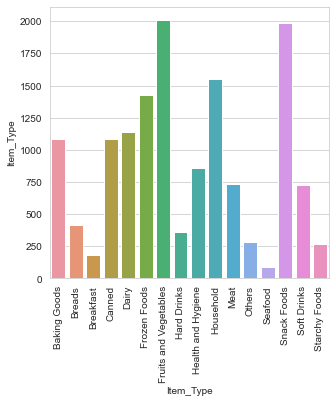

In [33]:
typ= master.groupby('Item_Type')['Item_Type'].agg(len)
sns.barplot(x=typ.index, y=typ)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT010'),
  Text(1, 0, 'OUT013'),
  Text(2, 0, 'OUT017'),
  Text(3, 0, 'OUT018'),
  Text(4, 0, 'OUT019'),
  Text(5, 0, 'OUT027'),
  Text(6, 0, 'OUT035'),
  Text(7, 0, 'OUT045'),
  Text(8, 0, 'OUT046'),
  Text(9, 0, 'OUT049')])

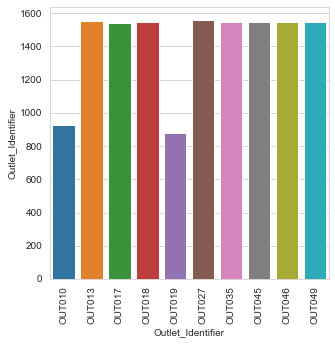

In [95]:
itentifier = master.groupby('Outlet_Identifier')['Outlet_Identifier'].agg(len)
sns.barplot(x=itentifier.index, y=itentifier)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Size'>

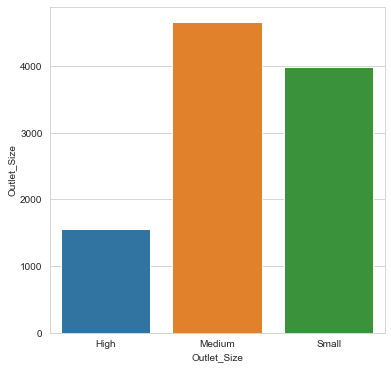

In [35]:
size= master.groupby('Outlet_Size')['Outlet_Size'].agg(len)
rcParams['figure.figsize'] = 6,6
sns.barplot(x=size.index, y=size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Location_Type'>

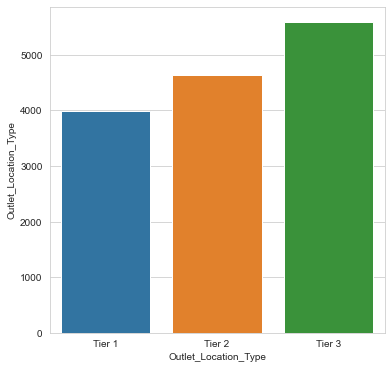

In [36]:
loce= master.groupby('Outlet_Location_Type')['Outlet_Location_Type'].agg(len)
rcParams['figure.figsize'] = 6,6
sns.barplot(x=loce.index, y=loce)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Outlet_Type'>

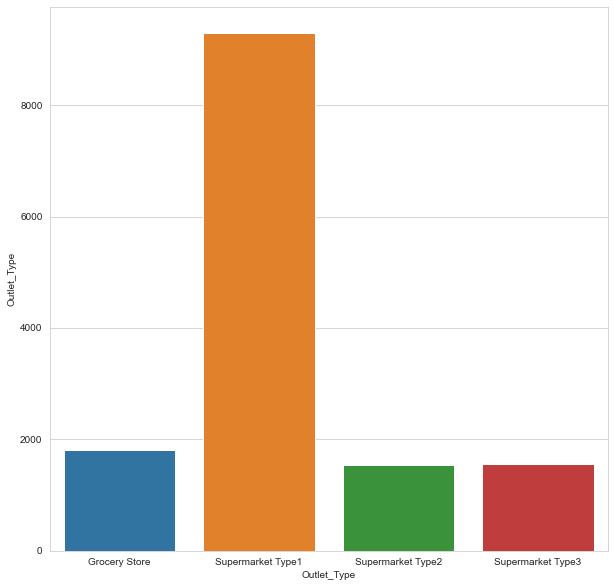

In [38]:
out= master.groupby('Outlet_Type')['Outlet_Type'].agg(len)
rcParams['figure.figsize'] = 10,10
sns.barplot(x=out.index, y=out)

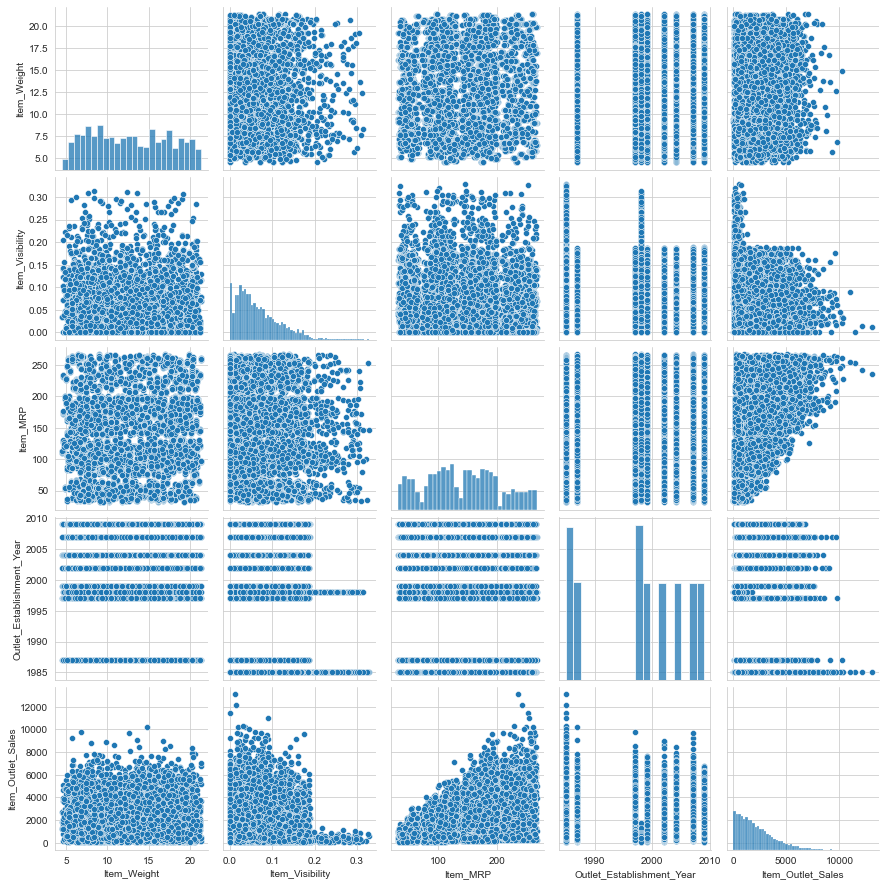

In [16]:
sns.pairplot(master)
plt.show()

,sumsquare_error,aic,bic,kl_div
uniform,0.048249,568.216245,-145917.433542,0.083522
powerlaw,0.060149,582.326887,-143314.555090,0.097770
exponpow,0.061225,590.576894,-143105.934966,0.093623
rayleigh,0.073571,599.832390,-140954.056104,0.113483
chi2,0.078905,608.101773,-140121.218437,0.122934


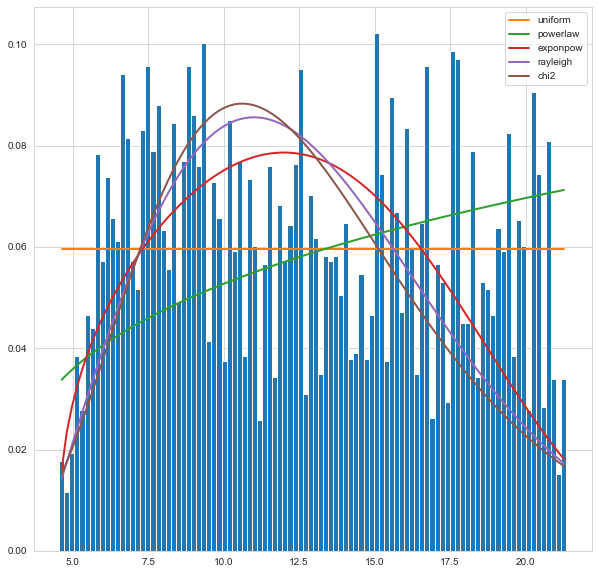

In [44]:
#dealing with missing data and outliers
master_data.Item_Weight.value_counts().sum()
f=Fitter(master_data.Item_Weight.dropna(), distributions= get_common_distributions())
f.fit()
f.summary()

In [42]:

random_Item_Weight = pd.DataFrame(np.random.uniform(master.Item_Weight.mean() - master.Item_Weight.std(),
                                   master.Item_Weight.mean() + master.Item_Weight.std(),
                                   master.Item_Weight.value_counts().sum()))
random_Item_Weight.columns=["number"]
master.Item_Weight = master.Item_Weight.fillna(random_Item_Weight.number)
master.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

# man naboodam

In [19]:
len(master.index)

14204

In [80]:
size_cleaning = pd.DataFrame(master.Outlet_Size.value_counts())

size_cleaning = pd.DataFrame(random.choices(size_cleaning.index,
                                  weights=master.Outlet_Size.value_counts(), k=len(master.index)))

size_cleaning.columns=["number"]
master.Outlet_Size = master.Outlet_Size.fillna(size_cleaning.number)
master.isnull().sum()
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

,sumsquare_error,aic,bic,kl_div
uniform,0.045382,568.216245,-179717.072400,0.085072
rayleigh,0.045953,602.238122,-179539.418490,0.068976
chi2,0.053400,608.717486,-177396.567753,0.080966
lognorm,0.054607,608.425500,-177079.086381,0.082915
gamma,0.055264,608.066599,-176909.304687,0.084020


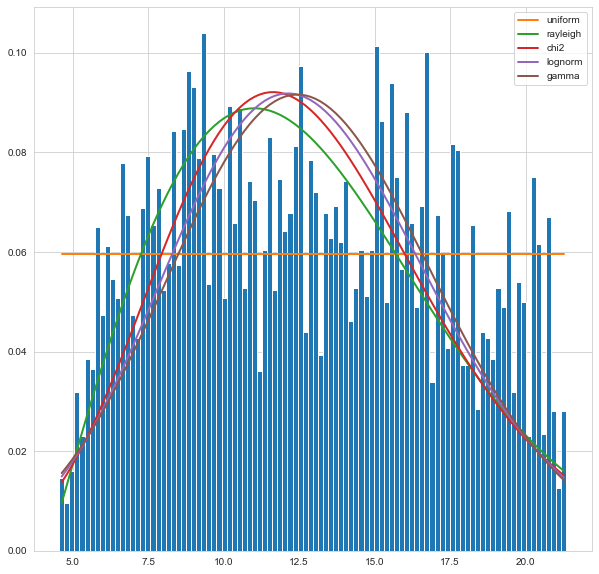

In [45]:
f=Fitter(master.Item_Weight, distributions= get_common_distributions())
f.fit()
f.summary()

C:\Users\Farshad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


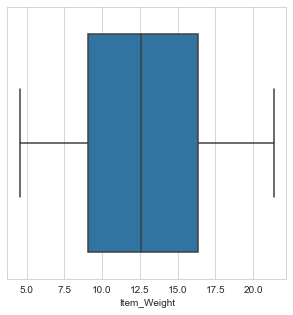

C:\Users\Farshad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


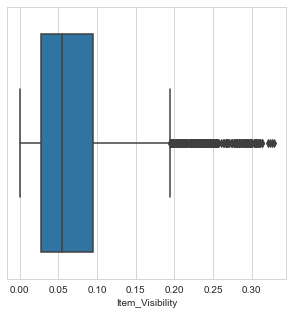

C:\Users\Farshad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


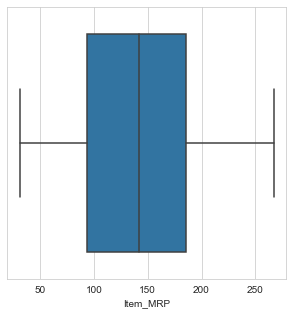

C:\Users\Farshad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


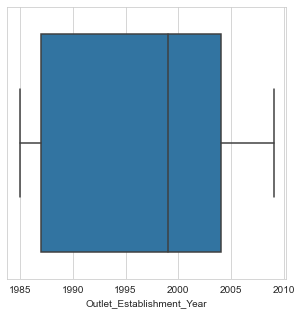

C:\Users\Farshad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


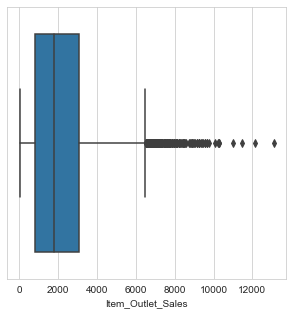

In [47]:
#dealing with outliers
rcParams['figure.figsize'] = 5,5
for i in master.describe().columns:
    sns.boxplot(master[i].dropna())
    plt.show()

In [82]:
master2 = master[master.Item_Visibility < 
                 master.Item_Visibility.mean() + 3*master.Item_Visibility.std()]
master3 = master2[master2.Item_Outlet_Sales <
                 master2.Item_Outlet_Sales.mean() + 3*master2.Item_Outlet_Sales.std()]
#here we omly use the changes we made through the item_visibility
master2.Outlet_Establishment_Year.describe()

count    14031.000000
mean      1997.916613
std          8.356236
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [93]:
#variable transformation
master2.Outlet_Establishment_Year=master2.Outlet_Establishment_Year+1985



C:\Users\Farshad\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [91]:
master2['Dummy_fat_low'] = master2.Item_Fat_Content=="Low Fat"
master2['Dummy_fat_regular'] = master2.Item_Fat_Content=="Regular"

<ipython-input-91-b7b60b54e987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2['Dummy_fat_low'] = master2.Item_Fat_Content=="Low Fat"
<ipython-input-91-b7b60b54e987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2['Dummy_fat_regular'] = master2.Item_Fat_Content=="Regular"


In [97]:
master2['Dummy_size_small'] = master2.Outlet_Size=="Small"
master2['Dummy_size_medium'] = master2.Outlet_Size=="Medium"
master2['Dummy_size_high'] = master2.Outlet_Size=="High"

<ipython-input-97-768c296bc506>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2['Dummy_size_small'] = master2.Outlet_Size=="Small"
<ipython-input-97-768c296bc506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2['Dummy_size_medium'] = master2.Outlet_Size=="Medium"
<ipython-input-97-768c296bc506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [103]:
master2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data', 'Dummy_fat_low',
       'Dummy_fat_regular', 'Dummy_size_small', 'Dummy_size_medium',
       'Dummy_size_high'],
      dtype='object')

In [122]:
master3=master2[master2['data']=='train']
master3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8428 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8428 non-null   object 
 1   Item_Weight                8428 non-null   float64
 2   Item_Fat_Content           8428 non-null   object 
 3   Item_Visibility            8428 non-null   float64
 4   Item_Type                  8428 non-null   object 
 5   Item_MRP                   8428 non-null   float64
 6   Outlet_Identifier          8428 non-null   object 
 7   Outlet_Establishment_Year  8428 non-null   int64  
 8   Outlet_Size                8428 non-null   object 
 9   Outlet_Location_Type       8428 non-null   object 
 10  Outlet_Type                8428 non-null   object 
 11  Item_Outlet_Sales          8428 non-null   float64
 12  data                       8428 non-null   object 
 13  Dummy_fat_low              8428 non-null   bool 

In [154]:



# Create the linear regression model object ("ols" stands for ordinary least squares)
model = smf.ols(data=master3, formula="Item_Outlet_Sales ~ Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP + Outlet_Identifier + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type + Dummy_fat_low + Dummy_fat_regular + Dummy_size_small + Dummy_size_medium + Dummy_size_high")

# Create a RegressionResults object
result = model.fit()

In [153]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     56.40
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.31e-36
Time:                        15:10:18   Log-Likelihood:                -74588.
No. Observations:                8428   AIC:                         1.492e+05
Df Residuals:                    8424   BIC:                         1.492e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1192.6498     11.637    102.492      0.000    1169.839    1215.460
Dummy_fat_low[T.True]       562.8681     18.526     30.383      0.000     526.553     599.183
Dummy_fat_regular[T.True]   629.7818     21.592     29.168      0.000     587.457     672.107
Dummy_size_small[T.True]    154.5825     26.073      5.929      0.000     103.474     205.691
Dummy_size_medium[T.True]   668.5617     24.862     26.890      0.000     619.825     717.298
Dummy_size_high[T.True]     369.5056     35.676     10.357      0.000     299.571     439.440
==============================================================================
Omnibus:                     1507.923   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2660.177
Skew:                           1.149   Prob(JB):                         0.00
Kurtosis:                       4.516   Cond. No.                     3.77e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

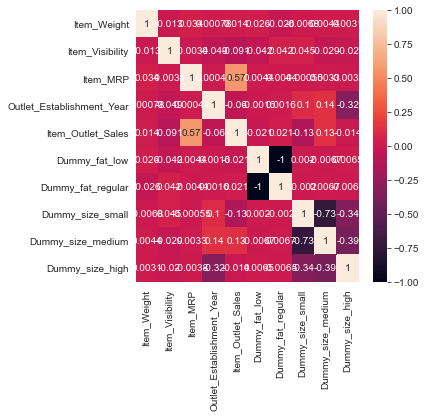

In [102]:
sns.heatmap(master2.corr(), annot=True);